In [3]:
%pip install --user responsibly

Note: you may need to restart the kernel to use updated packages.


In [4]:
import responsibly

# You should get '0.1.3'
responsibly.__version__


'0.1.3'

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
from responsibly.we import load_w2v_small

w2v_small = load_w2v_small()

In [8]:
# dataset vocabulary size

len(w2v_small.vocab)

26423

In [9]:
# get the vector of the word "love"

print('love =', w2v_small['love'])

love = [ 0.0386357  -0.0571296   0.00970471  0.0618904  -0.0618904   0.0250858
  0.109865   -0.0988782  -0.0527351   0.0754404  -0.00984205 -0.0307621
 -0.0103914  -0.0164797  -0.088258    0.0637215   0.0483405   0.0589607
  0.00283817 -0.0261844  -0.0144655   0.0298466   0.0860607  -0.0538337
  0.0629891  -0.0131838   0.0206912   0.0401006   0.0419317  -0.061158
 -0.0419317   0.0523688   0.00583656  0.0479742   0.0578621   0.028931
  0.0981458   0.0324101  -0.00943005  0.125246    0.0699472  -0.0787364
  0.0265506   0.00975049 -0.0399175  -0.0384526   0.0461432   0.0176699
  0.00828563  0.0218814  -0.0411993   0.056031   -0.0401006   0.00583656
  0.0336918   0.0421148  -0.0163881  -0.0426641  -0.00140192 -0.00682077
  0.0911877   0.0316777  -0.0265506   0.0677499   0.0131838  -0.0362553
 -0.0823985  -0.00123026 -0.0119936   0.0692148   0.106935   -0.032227
 -0.0419317   0.00801097 -0.114992   -0.0346074  -0.0710458   0.00567634
  0.069581    0.128908   -0.116457    0.0845958   0.03277

In [10]:
w2v_small['cat'] @ w2v_small['cat']

1.0000006

In [11]:
w2v_small['cat'] @ w2v_small['cats']

0.8099383

In [13]:
w2v_small['cat'] @ w2v_small['dog']

0.7609462

In [14]:
w2v_small['cat'] @ w2v_small['horse']

0.3814792

In [15]:
w2v_small['cat'] @ w2v_small['finance']

-0.03776038

In [16]:
w2v_small.most_similar('cat', topn=5)

[('cats', 0.8099379539489746),
 ('dog', 0.7609457969665527),
 ('kitten', 0.7464984655380249),
 ('feline', 0.7326232194900513),
 ('puppy', 0.707545280456543)]

###Let's find "the odd one out"

In [17]:
w2v_small.doesnt_match('hairdresser nurse man woman housekeeper personal_trainer'.split())

'nurse'

In [18]:
w2v_small.doesnt_match('hairdresser nurse man woman housekeeper manager'.split())

'manager'

In [19]:
w2v_small.doesnt_match('hairdresser nurse man men housekeeper manager'.split())

'manager'

In [20]:
w2v_small.doesnt_match('hairdresser nurse woman women housekeeper manager'.split())

'manager'

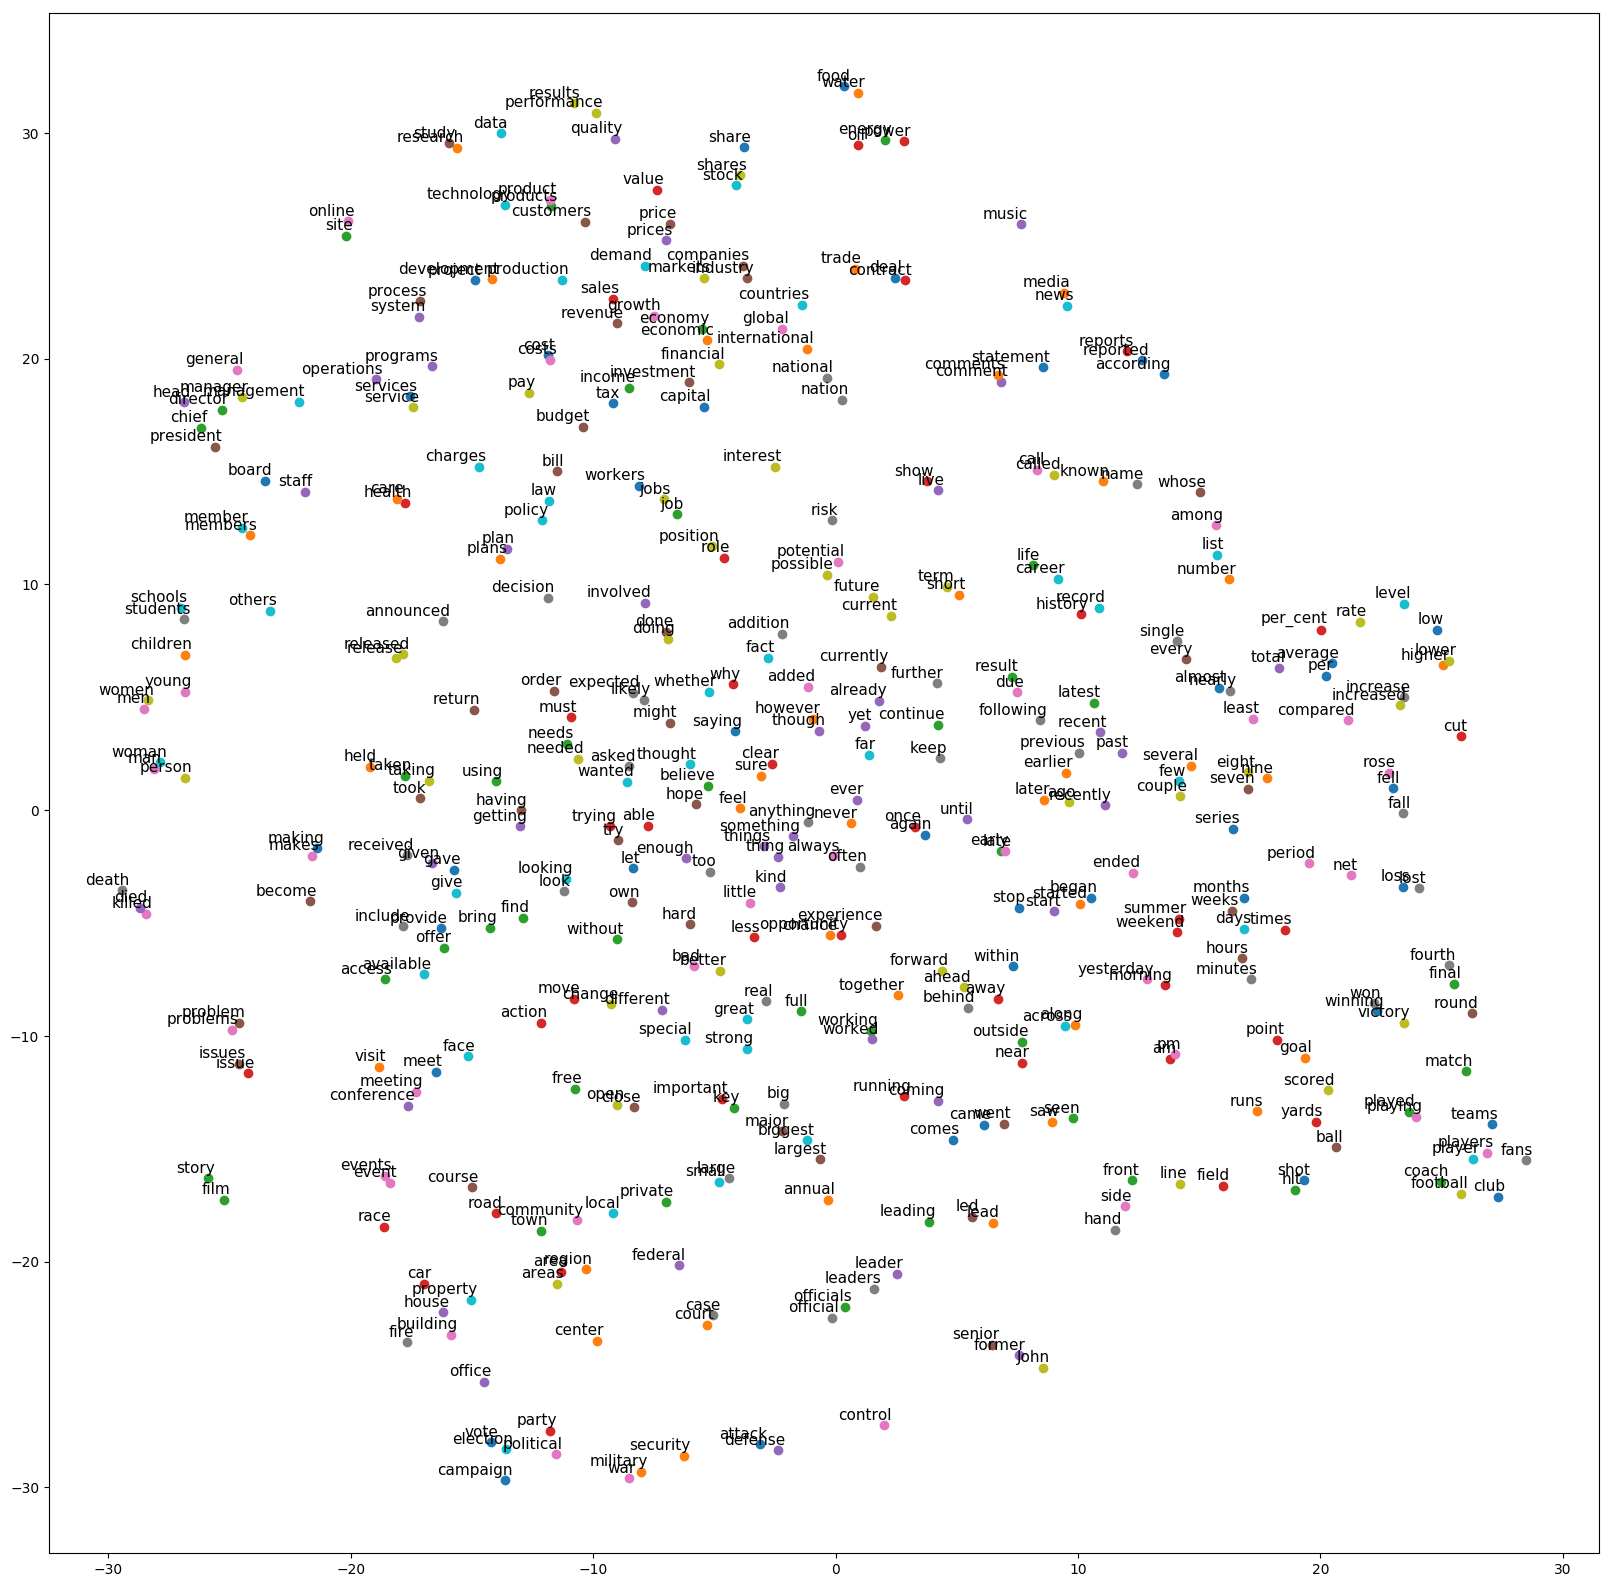

In [21]:
from sklearn.manifold import TSNE
from matplotlib import pylab as plt

# take the most common words in the corpus between 200 and 600
words = [word for word in w2v_small.index2word[200:600]]

# convert the words to vectors
embeddings = [w2v_small[word] for word in words]

# perform T-SNE
words_embedded = TSNE(n_components=2).fit_transform(embeddings)

# ... and visualize!
plt.figure(figsize=(20, 20))
for i, label in enumerate(words):
    x, y = words_embedded[i, :]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                 ha='right', va='bottom', size=11)
plt.show()

<img src="https://github.com/ResponsiblyAI/word-embedding/blob/main/images/linear-relationships.png?raw=1" />

<small>Source: [Tensorflow Documentation](https://www.tensorflow.org/tutorials/representation/word2vec)</small>

In [22]:
# small is to smaller as good is to what?
w2v_small.most_similar(positive=['good', 'smaller'], negative=['small'], topn=2)

[('better', 0.7270160913467407), ('stronger', 0.5597214102745056)]

In [23]:
# man is to carpenter as woman is to what?

w2v_small.most_similar(positive=['carpenter', 'woman'], negative=['men'], topn=2)

[('schoolteacher', 0.590914785861969), ('homemaker', 0.5572819709777832)]

In [24]:
# She is to sister as he is to what?
# sister - she + he = ?

w2v_small.most_similar(positive=['sister', 'he'], negative=['she'], topn=5)

[('brother', 0.7627110481262207),
 ('younger_brother', 0.6856132745742798),
 ('cousin', 0.6685015559196472),
 ('uncle', 0.6580697894096375),
 ('nephew', 0.65260249376297)]

In [25]:
#She is to interior designer as he is to what?
w2v_small.most_similar(positive=['interior_designer', 'he'], negative=['she'], topn=4)

[('architect', 0.623257040977478),
 ('carpenter', 0.46738606691360474),
 ('painter', 0.4598923623561859),
 ('restaurateur', 0.4586508572101593)]

In [26]:
from numpy.linalg import norm

gender_direction = w2v_small['she'] - w2v_small['he']

gender_direction /= norm(gender_direction)

In [27]:
# the @ operator returns the cosine similarity of 2 normalized vectors
gender_direction @ w2v_small['architect']

-0.16785558

In [28]:
gender_direction @ w2v_small['interior_designer']

0.19714224

In [29]:
gender_direction @ w2v_small['house']

0.072108954

In [30]:
gender_direction @ w2v_small['home']

-0.016742866

In [31]:
from responsibly.we import GenderBiasWE

w2v_small_gender_bias = GenderBiasWE(w2v_small, only_lower=True)

In [32]:
w2v_small_gender_bias.positive_end, w2v_small_gender_bias.negative_end

('she', 'he')

In [33]:
# gender direction
w2v_small_gender_bias.direction[:10]

array([-0.10056252, -0.09987912, -0.05384335,  0.00480521,  0.01521064,
       -0.01666582,  0.00932551, -0.00625998, -0.11320096,  0.03992423])

In [34]:
# list of gender neutral professions
from responsibly.we.data import BOLUKBASI_DATA

neutral_profession_names = BOLUKBASI_DATA['gender']['neutral_profession_names']

In [35]:
neutral_profession_names[:8]

['accountant',
 'acquaintance',
 'actor',
 'adjunct_professor',
 'administrator',
 'adventurer',
 'advocate',
 'aide']

In [36]:
len(neutral_profession_names)

303

In [37]:
# the same of using the @ operator on the bias direction

w2v_small_gender_bias.project_on_direction(neutral_profession_names[0])

0.008421657745918763

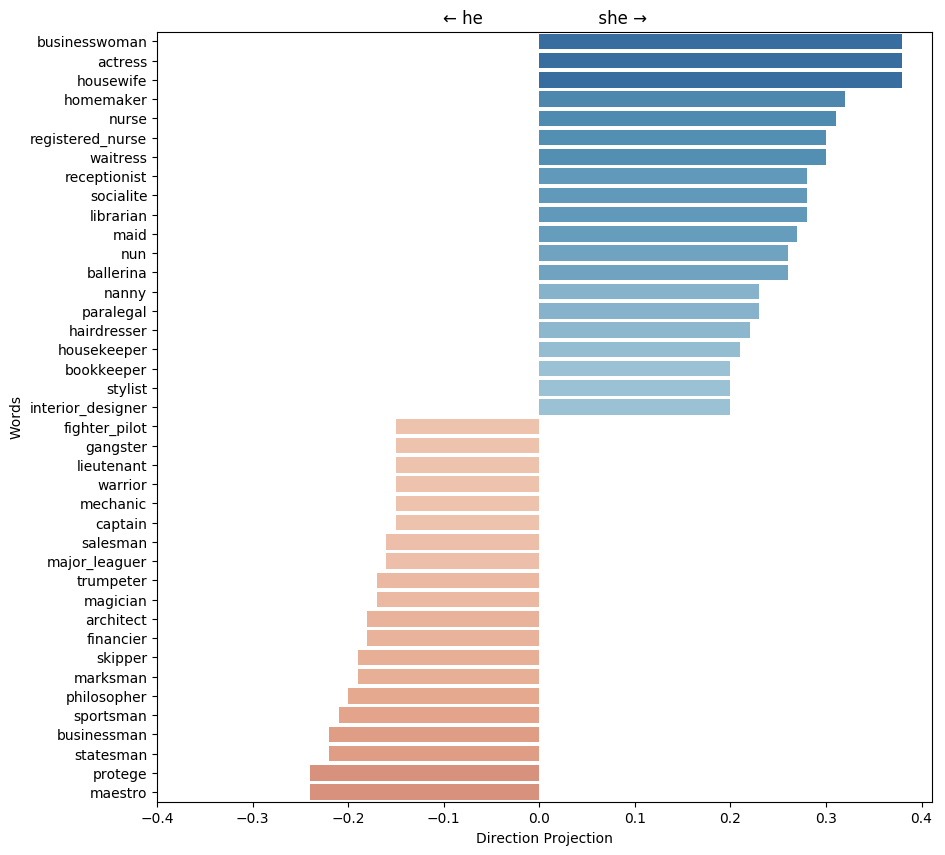

In [38]:
import matplotlib.pylab as plt

f, ax = plt.subplots(1, figsize=(10, 10))

w2v_small_gender_bias.plot_projection_scores(n_extreme=20, ax=ax);

In [39]:
# high-level function to calculate gender bias built into responsibly

w2v_small_gender_bias.calc_direct_bias()

0.07307905334055052

In [40]:
# what responsibly does within the calc_direct_bias function:

neutral_profession_projections = [w2v_small[word] @ w2v_small_gender_bias.direction
                                  for word in neutral_profession_names]

abs_neutral_profession_projections = [abs(proj) for proj in neutral_profession_projections]

sum(abs_neutral_profession_projections) / len(abs_neutral_profession_projections)

0.07307905324756833

In [41]:
len(w2v_small_gender_bias._data['neutral_words'])

26189

In [42]:
import random
print(random.sample(w2v_small_gender_bias._data['neutral_words'],10))

['energize', 'disparity', 'horizons', 'belief', 'lighten', 'unsold', 'hardworking', 'manifested', 'secular', 'inkling']


In [43]:
# we obtain a version of the embeddings that is mitigated wrt the gender direction
w2v_small_gender_debias = w2v_small_gender_bias.debias(method='neutralize', inplace=False)

In [44]:
# measure of bias in the original embeddings
w2v_small_gender_bias.calc_direct_bias()

0.07307905332099045

In [45]:
# measure of bias in the mitigated embeddings
w2v_small_gender_debias.calc_direct_bias()

1.2468902660624563e-09

In [46]:
'home' in (w2v_small_gender_bias._data['neutral_words'])

True

In [47]:
print('home:',
      'before =', w2v_small_gender_bias.model['home'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['home'] @ w2v_small_gender_debias.direction)

home: before = 0.01134050519990803 after =  -1.3220983713955846e-09


In [48]:
print('architect:',
      'before =', w2v_small_gender_bias.model['architect'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['architect'] @ w2v_small_gender_debias.direction)

architect: before = -0.17738308847052164 after =  8.568469156433283e-10


In [49]:
print('interior_designer:',
      'before =', w2v_small_gender_bias.model['interior_designer'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['interior_designer'] @ w2v_small_gender_debias.direction)

interior_designer: before = 0.19845775138896118 after =  7.606482169240518e-11


In [50]:
'man' in (w2v_small_gender_bias._data['neutral_words'])

False

In [51]:
print('man:',
      'before =', w2v_small_gender_bias.model['man'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['man'] @ w2v_small_gender_debias.direction)

man: before = -0.22095190804497022 after =  -0.22095190804497022


In [52]:
print('woman:',
      'before =', w2v_small_gender_bias.model['woman'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['woman'] @ w2v_small_gender_debias.direction)

woman: before = 0.34034749688327315 after =  0.34034749688327315


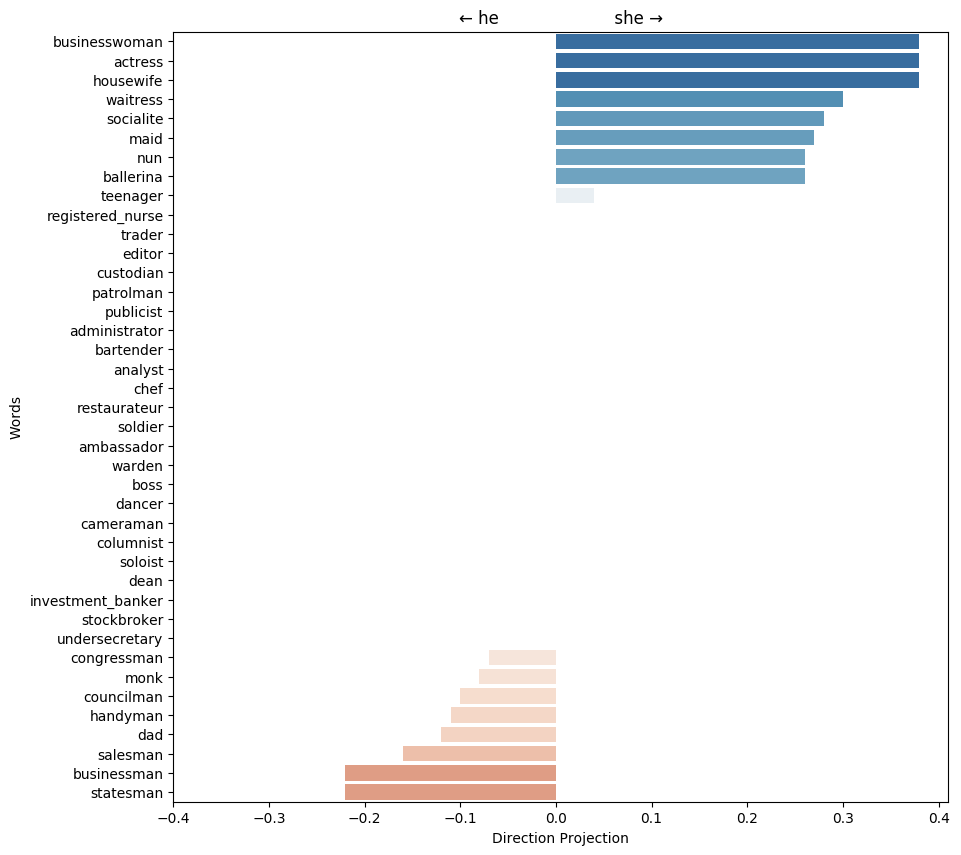

In [53]:
f, ax = plt.subplots(1, figsize=(10, 10))

w2v_small_gender_debias.plot_projection_scores(n_extreme=20, ax=ax);

In [55]:
# Descargar el modelo e importar librerías necesarias
import numpy as np
import logging

from numpy.linalg import norm
from gensim.models import KeyedVectors
from sklearn.metrics import classification_report, accuracy_score

logging.basicConfig(format='%(asctime)s : %(message)s', level=logging.INFO)

!wget -q http://dcc.uchile.cl/~jperez/word-embeddings/fasttext-sbwc.100k.vec.gz

!gzip -d -q fasttext-sbwc.100k.vec.gz
!ls

 EMNLP_paper.pdf	  main_tutorial_bias_word_embedding.ipynb
 fasttext-sbwc.100k.vec  'Quiz4-CSCE 771-19Nov2024.pdf'


In [56]:
we = KeyedVectors.load_word2vec_format('fasttext-sbwc.100k.vec')
# Esto normaliza los vectores
we.init_sims(replace=True)

2024-12-03 21:53:44,445 : loading projection weights from fasttext-sbwc.100k.vec
2024-12-03 21:53:52,660 : loaded (100000, 300) matrix from fasttext-sbwc.100k.vec
2024-12-03 21:53:52,661 : precomputing L2-norms of word weight vectors


In [57]:
# definimos cuándo dos vectores son "casi iguales" en este embedding

from numpy.testing import assert_almost_equal

length_vectors = norm(we.vectors_norm, axis=1)

assert_almost_equal(actual=length_vectors,
                    desired=1,
                    decimal=5)

In [58]:
we.most_similar(positive=['doctor'],negative=['mujer'])

[('dr', 0.4176639914512634),
 ('licenciado', 0.3791270852088928),
 ('doctores', 0.3671714663505554),
 ('honoris', 0.3577732443809509),
 ('professor', 0.34742414951324463),
 ('neurólogo', 0.3422521650791168),
 ('cirujano', 0.33602601289749146),
 ('traumatólogo', 0.3323988914489746),
 ('profesor', 0.33126506209373474),
 ('cardiólogo', 0.3256565034389496)]

In [59]:
we.most_similar(positive=['doctora'],negative=['hombre'])

[('psicóloga', 0.43664997816085815),
 ('bióloga', 0.40995094180107117),
 ('catedrática', 0.40756943821907043),
 ('profesora', 0.40630972385406494),
 ('historiadora', 0.38048917055130005),
 ('investigadora', 0.3678087592124939),
 ('licenciada', 0.366742342710495),
 ('vicerrectora', 0.3654743432998657),
 ('filóloga', 0.36261123418807983),
 ('ginecóloga', 0.35758891701698303)]

In [60]:
we.most_similar(positive=['inteligente', 'mujer'], negative=['hombre'])

[('sensata', 0.4874057173728943),
 ('talentosa', 0.48738622665405273),
 ('innovadora', 0.47544434666633606),
 ('manipuladora', 0.4719089865684509),
 ('emprendedora', 0.46958673000335693),
 ('atractiva', 0.45731809735298157),
 ('extrovertida', 0.4571165144443512),
 ('impulsiva', 0.44972628355026245),
 ('educada', 0.447437047958374),
 ('ingeniosa', 0.44558414816856384)]

In [61]:
we.most_similar(positive=['inteligente', 'hombre'], negative=['mujer'])

[('astuto', 0.5987648963928223),
 ('inteligentemente', 0.565445601940155),
 ('inteligentes', 0.5556885004043579),
 ('intuitivo', 0.5533121824264526),
 ('visionario', 0.5499666929244995),
 ('bondadoso', 0.5497375726699829),
 ('afable', 0.5486626625061035),
 ('disciplinado', 0.5481559634208679),
 ('honesto', 0.5480844974517822),
 ('ingenioso', 0.5475456714630127)]

In [62]:
we.most_similar(positive=['médico','mujer'], negative=['hombre'])

[('ginecóloga', 0.6046308279037476),
 ('obstetra', 0.5925636887550354),
 ('pediatra', 0.5792399048805237),
 ('ginecológica', 0.5755670070648193),
 ('obstetricia', 0.562862753868103),
 ('enfermera', 0.5607845783233643),
 ('médica', 0.5571267604827881),
 ('médicos', 0.5507985353469849),
 ('ginecología', 0.5502138137817383),
 ('obstétrica', 0.5493755340576172)]

In [63]:
we.most_similar(positive=['médico','hombre'], negative=['mujer'])

[('cardiólogo', 0.596772313117981),
 ('cirujano', 0.5966023802757263),
 ('traumatólogo', 0.5808753967285156),
 ('medico', 0.5804007053375244),
 ('galeno', 0.5700283050537109),
 ('ginecólogo', 0.5457277297973633),
 ('neurólogo', 0.54304438829422),
 ('enfermero', 0.5366503000259399),
 ('psiquiatra', 0.5364155173301697),
 ('neurocirujano', 0.5363881587982178)]

In [64]:
we.most_similar(positive=['médica','hombre'], negative=['mujer'])

[('médico', 0.5506406426429749),
 ('medica', 0.5366383790969849),
 ('médicas', 0.5251321196556091),
 ('clínica', 0.5138856172561646),
 ('médicos', 0.499112069606781),
 ('medico', 0.49768391251564026),
 ('quirúrgica', 0.49031704664230347),
 ('galeno', 0.4826927185058594),
 ('odontológica', 0.48202377557754517),
 ('hospitalaria', 0.4809926748275757)]

In [65]:
we.most_similar(positive=['médica','mujer'], negative=['hombre'])

[('ginecológica', 0.6155674457550049),
 ('obstétrica', 0.5944493412971497),
 ('obstetricia', 0.5862675905227661),
 ('pediátrica', 0.5625762939453125),
 ('ginecología', 0.5593430995941162),
 ('obstétricos', 0.5461073517799377),
 ('medica', 0.5453529357910156),
 ('ambulatoria', 0.5365152955055237),
 ('obstétricas', 0.5328614115715027),
 ('odontológica', 0.5309116244316101)]

In [66]:
from responsibly.we import BiasWordEmbedding

we_genero = BiasWordEmbedding(we, only_lower=True)

2024-12-03 21:57:56,552 : precomputing L2-norms of word weight vectors


In [67]:
espacio_f = ['ella']
espacio_m = ['él']

we_genero._identify_direction('Femenino', 'Masculino',
                                          definitional=(espacio_f, espacio_m),
                                          method='sum')

In [68]:
gender_direction = we_genero.direction

gender_direction /= norm(gender_direction)

In [69]:
gender_direction @ we.word_vec('arquitecta')

0.21170145

In [70]:
gender_direction @ we.word_vec('arquitecto')

-0.09577321

In [71]:
espacio_f = ['mujer', 'ella' , 'chica', 'niña', 'esposa', 'señora', 'hermana', 'madre', 'abuela']
espacio_m = ['hombre', 'él', 'chico', 'niño', 'esposo', 'señor', 'hermano', 'padre','abuelo']

we_genero._identify_direction('Femenino', 'Masculino',
                                          definitional=(espacio_f, espacio_m),
                                          method='sum')

In [72]:
gender_direction = we_genero.direction

gender_direction /= norm(gender_direction)

In [73]:
gender_direction @ we.word_vec('arquitecta')

0.29372594

In [74]:
gender_direction @ we.word_vec('arquitecto')

-0.19526821

In [75]:
gender_direction @ we.word_vec('arquitectura')

0.01069098

In [76]:
gender_direction @ we.word_vec('ingeniería')

-0.06690517

In [77]:
gender_direction @ we.word_vec('obstetricia')

0.06260889

In [78]:
gender_direction @ we.word_vec('medicina')

-0.023807863

In [79]:
gender_direction @ we.word_vec('casa')

0.036148664

In [80]:
gender_direction @ we.word_vec('hogar')

-0.030880788

In [82]:
profesiones_neutras = [
    'chofer',
    'columnista',
    'publicista',
    'naturista',
    'asistente',
    'taxista',
    'psiquiatra',
    'policia',
    'dentista',
    'florista',
    'docente',
    'periodista',
    'electricista',
    'economista',
    'atleta',
    'terapeuta',
    'piloto',
    'modelo',
    'estudiante',
    'comerciante',
    'chef',
    'cantante',
    'militar',
]

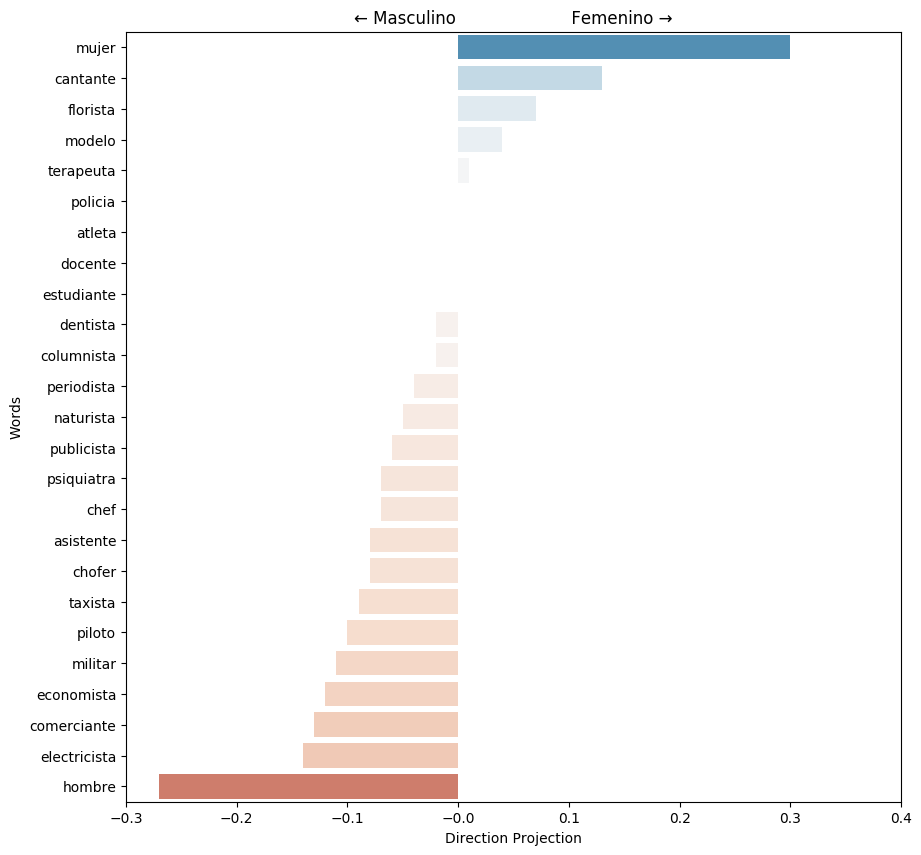

In [83]:
import matplotlib.pylab as plt

f, ax = plt.subplots(1, figsize=(10, 10))

we_genero.plot_projection_scores(
    profesiones_neutras + espacio_f[:1] + espacio_m[:1],
    n_extreme=20,
    ax=ax);

In [84]:
we_genero.calc_direct_bias(profesiones_neutras, c=None)

0.06407626815464186

In [85]:
len(profesiones_neutras)

23

In [86]:
we_genero_debias = we_genero.debias(method = 'neutralize' , neutral_words= profesiones_neutras, inplace=False)


2024-12-03 21:58:42,228 : precomputing L2-norms of word weight vectors
2024-12-03 21:58:43,002 : precomputing L2-norms of word weight vectors


In [87]:
w2v_small_gender_debias = w2v_small_gender_bias.debias(method='neutralize', inplace=False)

2024-12-03 21:58:50,201 : precomputing L2-norms of word weight vectors
2024-12-03 21:58:50,747 : precomputing L2-norms of word weight vectors


In [89]:
#Si medimos el sesgo después de la mitigación vemos que se ha reducido muchísimo! y el gráfico también indica lo mismo.

In [90]:
we_genero_debias.calc_direct_bias(profesiones_neutras, c=None)

9.152719702915814e-09

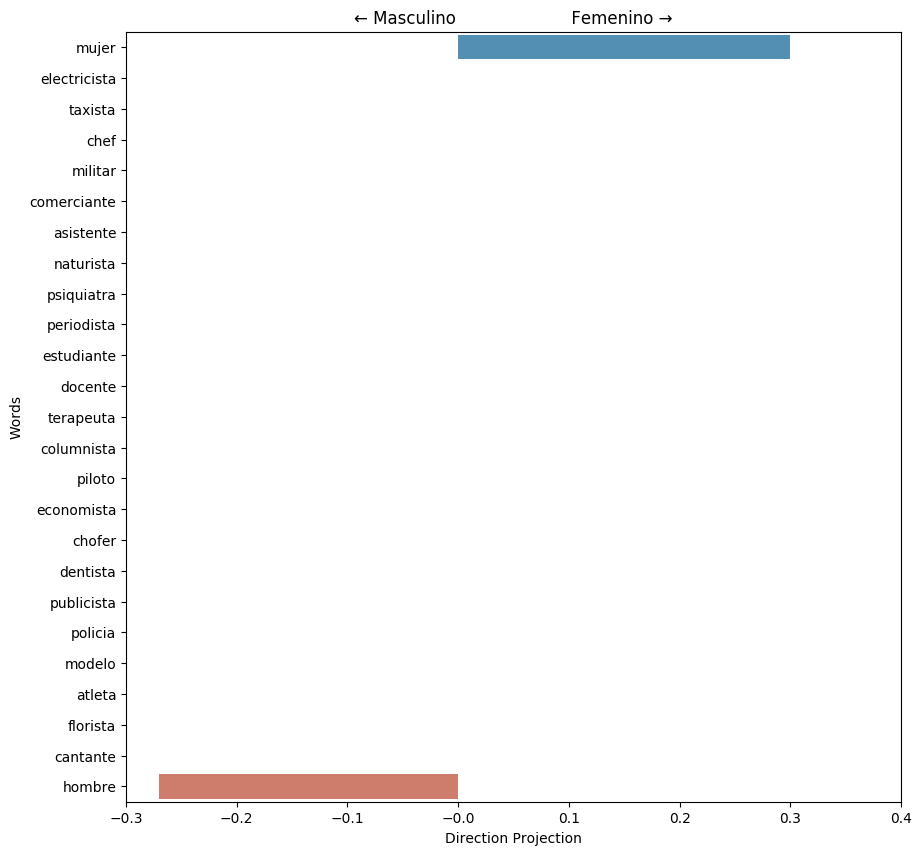

In [91]:
f, ax = plt.subplots(1, figsize=(10, 10))

we_genero_debias.plot_projection_scores(
    profesiones_neutras + espacio_f[:1] + espacio_m[:1],
    n_extreme=20,
    ax=ax);

In [92]:
print('estudiante:',
      'antes =', we_genero.model['estudiante'] @ we_genero.direction,
      'después = ', we_genero_debias.model['estudiante'] @ we_genero_debias.direction)

estudiante: antes = -0.0048034927 después =  5.1541065e-09


In [93]:
print('ingeniero:',
      'antes =', we_genero.model['ingeniero'] @ we_genero.direction,
      'después = ', we_genero_debias.model['ingeniero'] @ we_genero_debias.direction)

ingeniero: antes = -0.24747832 después =  -0.24747832


In [94]:
print('laboralista:',
      'antes =', we_genero.model['laboralista'] @ we_genero.direction,
      'después = ', we_genero_debias.model['laboralista'] @ we_genero_debias.direction)

laboralista: antes = -0.08559768 después =  -0.08559768


In [96]:
verbos = [ 
          'comprar',
          'vender',
          'dormir',
          'despertar',
          'soñar',
          'llorar',
          'gritar',
          'hablar',
          'preguntar',
          'pensar',
          'inventar',
          'bailar',
          'cantar',
          'cocinar',
          'sentir',
          'bordar',
          'tejer',
          'coser',
          'razonar',
          'argumentar',
          'cursar',
          'programar'
]

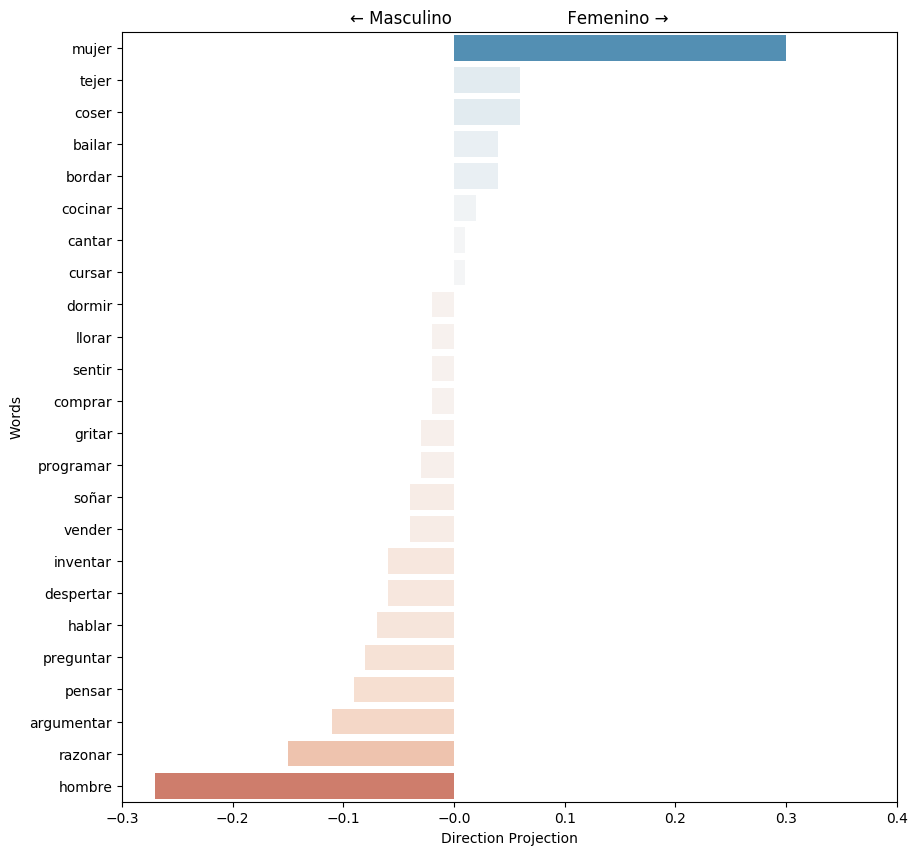

In [97]:
f, ax = plt.subplots(1, figsize=(10, 10))

we_genero.plot_projection_scores(
    verbos + ['hombre'] + ['mujer'],
    n_extreme=20,
    ax=ax);

In [98]:
profesiones_colectivos = [
'ingeniería',
'arquitectura',
'psicología',
'enfermería',
'medicina',
'carpintería',
'presidencia',
'biología',
'cocina',
'docencia',
'abogacía',
'cirugía',
'neurocirugía',
'actuación',
'música',
'canto'
]

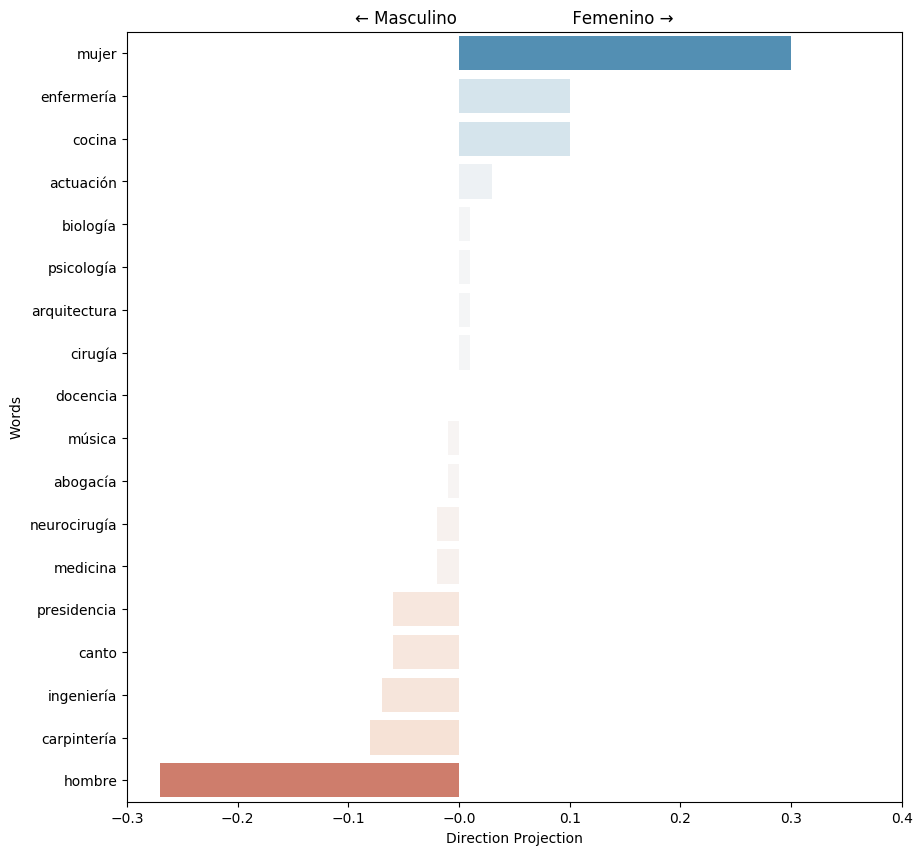

In [99]:
f, ax = plt.subplots(1, figsize=(10, 10))

we_genero.plot_projection_scores(
    profesiones_colectivos + ['hombre'] + ['mujer'],
    n_extreme=20,
    ax=ax);

In [100]:
sustantivos_abstractos = [
'inteligencia',
'belleza',
'humildad',
'sabiduría',
'poder',
'cariño',
'bondad',
'ambición',
'delicadeza',
'amabilidad',
'paciencia',
'popularidad',
'fama',
'generosidad',
'honestidad',
'canto',
'maldad',
'soberbia',
'violencia'
]


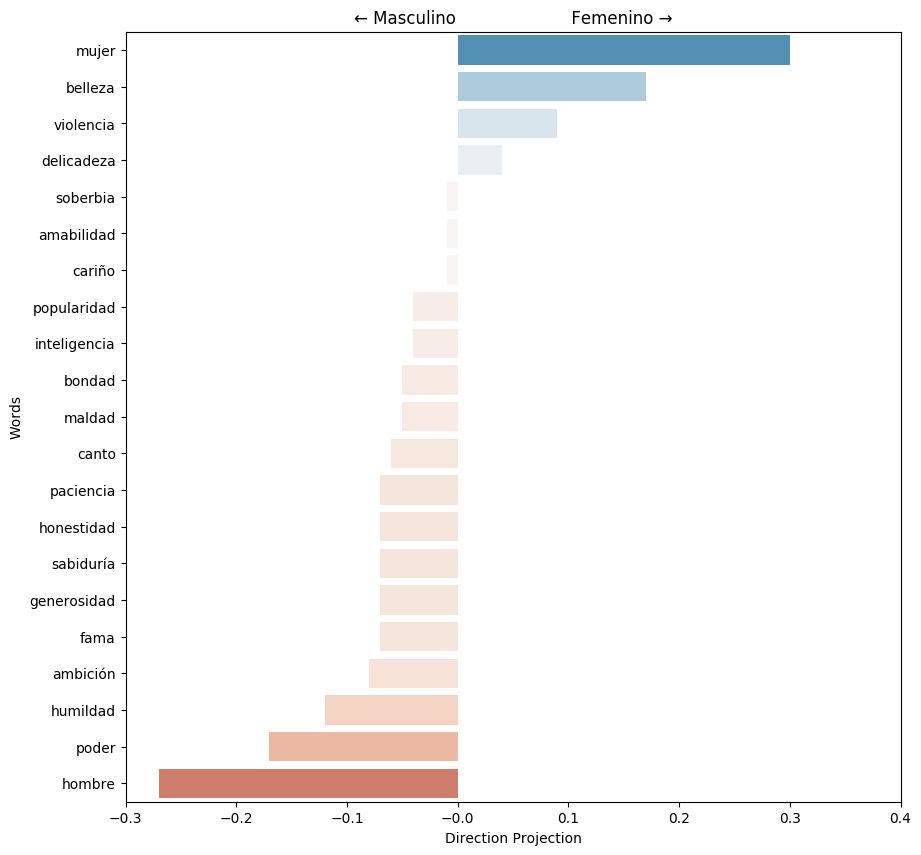

In [101]:
f, ax = plt.subplots(1, figsize=(10, 10))

we_genero.plot_projection_scores(
    sustantivos_abstractos + ['hombre'] + ['mujer'],
    n_extreme=20,
    ax=ax);

In [102]:
adjetivos_neutros = [
'inteligente',
'humilde',
'amable',
'dulce',
'audaz',
'paciente',
'popular',
'flexible',
'grande',
'brillante',
'inocente',
'fácil',
'agradable',
'infeliz',
'capaz',
'difícil',
'temperamental',
]

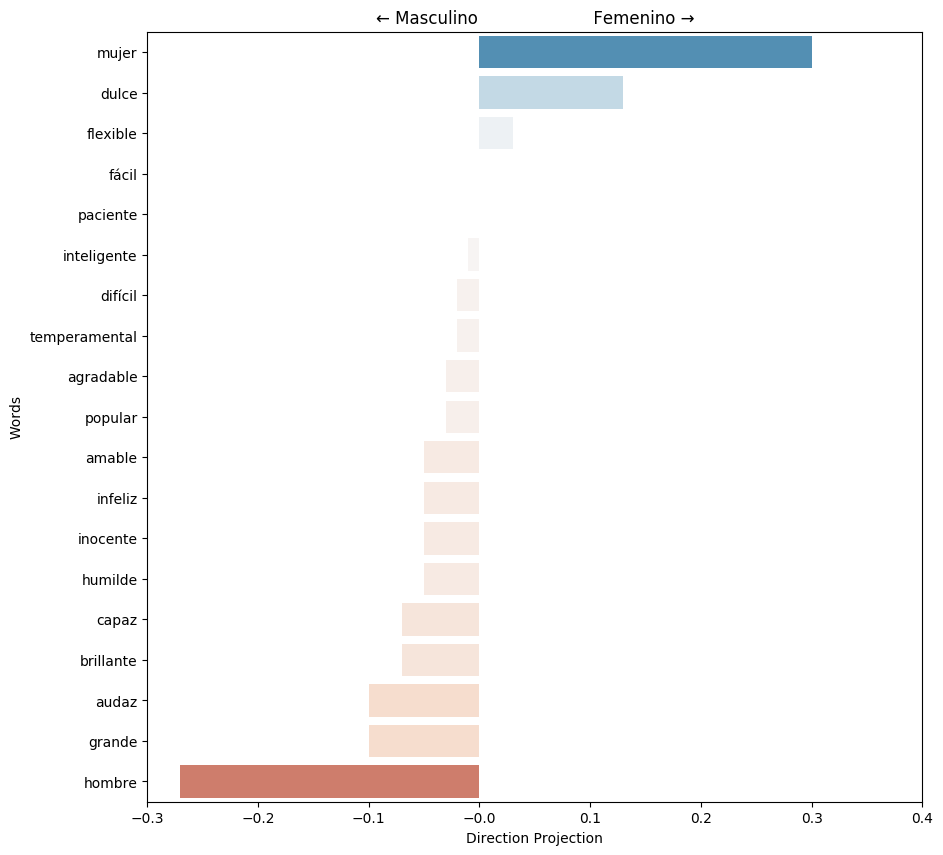

In [103]:
f, ax = plt.subplots(1, figsize=(10, 10))

we_genero.plot_projection_scores(
    adjetivos_neutros + ['hombre'] + ['mujer'],
    n_extreme=20,
    ax=ax);

In [104]:
palabras_con_genero = ['gato','gata']

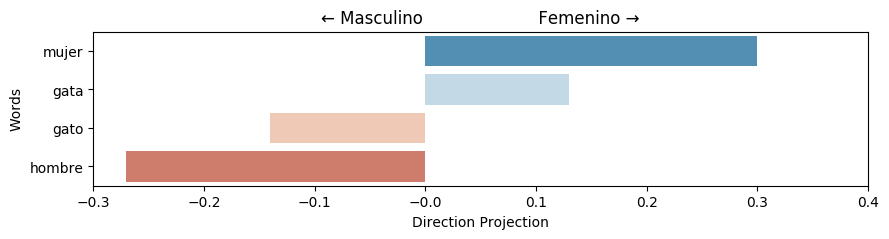

In [105]:
f, ax = plt.subplots(1, figsize=(10, 2))

we_genero.plot_projection_scores(
    palabras_con_genero + espacio_f[:1] + espacio_m[:1],
    n_extreme=20,
    ax=ax);

In [106]:
profesiones_con_genero = [
                          'arquitecta', 'arquitecto',
                          'ingeniera', 'ingeniero',
                          'diseñadora', 'diseñador',
                          'doctor', 'doctora',
                          'abogada', 'abogado',
                          'profesor', 'profesora',
                          'contador','contadora',
                          'científico', 'científica',
                          'biólogo', 'bióloga',
                          'cocinera', 'cocinero',
                          'psicóloga','psicólogo',
                          'enfermera', 'enfermero',
                          'obrera', 'obrero',
                          'actor', 'actriz'
                          ]

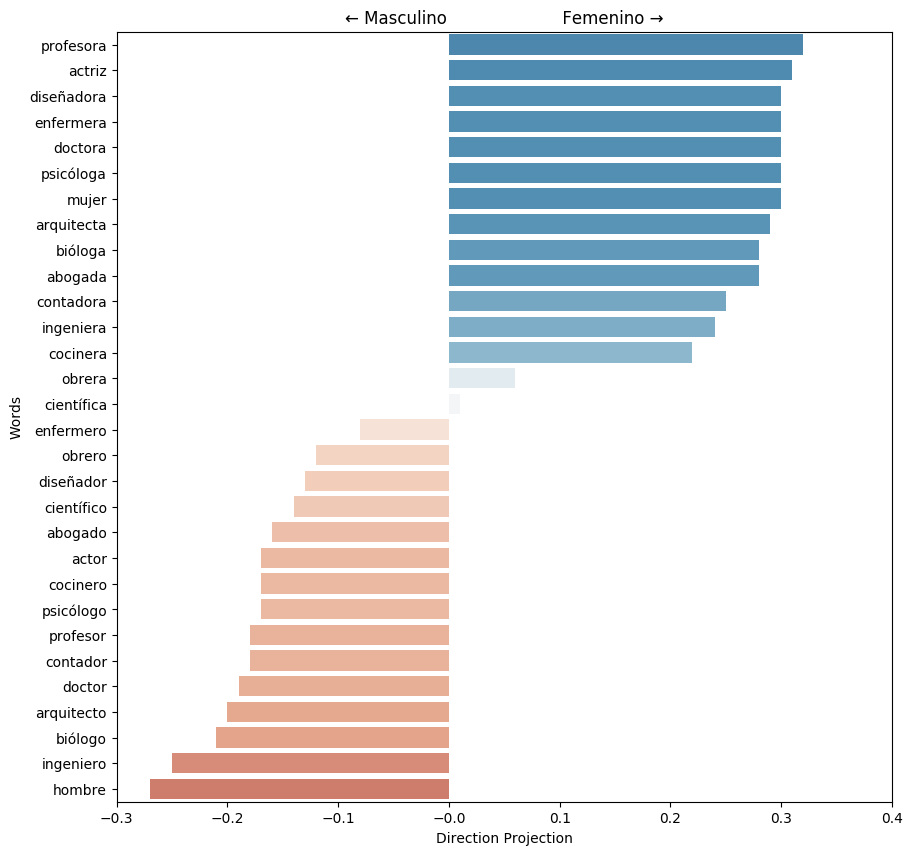

In [107]:
f, ax = plt.subplots(1, figsize=(10, 10))

we_genero.plot_projection_scores(
    profesiones_con_genero + espacio_f[:1] + espacio_m[:1],
    n_extreme=20,
    ax=ax);

In [108]:
gender_direction = we_genero.direction

In [109]:
abs(gender_direction @ we.word_vec('gato')) - abs(gender_direction @ we.word_vec('gata'))

0.0015478581

In [110]:
abs(gender_direction @ we.word_vec('arquitecta')) - abs(gender_direction @ we.word_vec('arquitecto'))

0.098457724

In [111]:
abs(gender_direction @ we.word_vec('médica')) - abs(gender_direction @ we.word_vec('médico'))

-0.024638474

In [112]:
abs(gender_direction @ we.word_vec('enfermera')) - abs(gender_direction @ we.word_vec('enfermero'))

0.21549931